## Final Project Submission

Please fill out:
* Student name: Shawn J Irungu
* Student pace: Hybrid
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL:


### PROJECT INTRODUCTION
##### The aviation industry is one of the most capital-intensive and highly regulated sectors, requiring strategic planning and data-driven decision-making. Airlines, charter companies, and new aviation startups face significant challenges when selecting aircraft for purchase or lease. These challenges include assessing safety records, operational risks, maintenance costs, and long-term profitability.


##### Many companies make investment decisions without fully understanding the historical performance and accident trends of different aircraft models, leading to financial losses, increased safety risks, and inefficient operations. This project aims to develop a data-driven aviation consulting framework that provides expert guidance to aviation companies before purchasing aircraft. By analyzing historical aviation data, accident trends, and operational metrics, the consulting service will help clients make informed aircraft acquisition decisions, minimizing risks and optimizing costs.

### BUSINESS PROBLEM
##### The company is seeking to expand its portfolio by entering the aviation industry, with a focus on purchasing and operating aircraft for both commercial and private use. A key challenge is identifying aircraft models that present the lowest operational and safety risks. To make strategic and data-driven investment decisions, the company requires a comprehensive analysis of historical aviation data, accident trends, and maintenance records. This will ensure optimal aircraft selection, minimizing risks while maximizing efficiency and profitability in this new market segment.

### MAIN OBJECTIVE
* To identify the safest and most reliable aircraft models for commercial and private operations, enabling the company to make data-driven investment decisions while minimizing operational risks and maximizing profitability.

### SPECIFIC OBJECTIVE
* Which aircraft models have the lowest accident rates? 
* What are the most common causes of aviation accidents?
* How does the number of engines affect accident frequency and severity?
* What is the relationship between aircraft category and accident rates?


### Libraries Importation

In [87]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime

### Loading our Data Set - Aviation Dataset

In [88]:
df = pd.read_csv('./data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Wrangling Process

In [89]:
# check for duplicates
df.duplicated().value_counts()

# this returns a true of 1390 . meaning we have 1390 duplicated rows

False    88889
dtype: int64

In [90]:
# check for shape
df.shape

# this shows that our df has 90348 rows(including the dupliacted) and 31 columns

(88889, 31)

In [91]:
# check information
df.info()

# this shows the data types and also columns that don`t count to 90348 
# indicates that they contain missing values
# also shows that we need to change dtypes of some columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [92]:
# print the column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [93]:
# show the summary statistics 
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data Cleaning

In [94]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [95]:
df.shape

(88889, 31)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### This to Note
1.We note that in our data the data type for Event.Date is an object instead of date.

2.There are several missing values in some columns

In [97]:
# DROPING COLUMNS
# dropping of unnecessary columns for our analysis
# first create a list of the columns we are interested in
 
c = ['Event.Id', 'Make', 'Model', 'Accident.Number', 'Total.Fatal.Injuries','FAR.Description', 
 'Broad.phase.of.flight', 'Number.of.Engines', 'Accident.Number', 'Total.Fatal.Injuries',
  'Aircraft.Category', 'Accident.Number', 'Total.Fatal.Injuries'] 
c=set(c)
columns_to_keep=list(c)
print(columns_to_keep)
type(columns_to_keep)

['FAR.Description', 'Number.of.Engines', 'Total.Fatal.Injuries', 'Broad.phase.of.flight', 'Model', 'Make', 'Aircraft.Category', 'Event.Id', 'Accident.Number']


list

In [98]:
# pass the list to the dataframe 
df=df[columns_to_keep]
df.set_index(('Event.Id'))

,FAR.Description,Number.of.Engines,Total.Fatal.Injuries,Broad.phase.of.flight,Model,Make,Aircraft.Category,Accident.Number
Event.Id,,,,,,,,
20001218X45444,NaN,1.0,2.0,Cruise,108-3,Stinson,NaN,SEA87LA080
20001218X45447,NaN,1.0,4.0,Unknown,PA-24-180,Piper,NaN,LAX94LA336
20061025X01555,NaN,1.0,3.0,Cruise,172M,Cessna,NaN,NYC07LA005
20001218X45448,NaN,1.0,2.0,Cruise,112,Rockwell,NaN,LAX96LA321
20041105X01764,NaN,NaN,1.0,Approach,501,Cessna,NaN,CHI79FA064
...,...,...,...,...,...,...,...,...
2.02212E+13,91,NaN,0.0,NaN,PA-28-151,PIPER,NaN,ERA23LA093
2.02212E+13,NaN,NaN,0.0,NaN,7ECA,BELLANCA,NaN,ERA23LA095
2.02212E+13,91,1.0,0.0,NaN,8GCBC,AMERICAN CHAMPION AIRCRAFT,Airplane,WPR23LA075


In [99]:
# using list comprehension
# this is an alternative way to drop columns
# df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

In [100]:
df.shape

(88889, 9)

In [101]:
# Look number of missing values per column.
df.isna().sum()

FAR.Description          56866
Number.of.Engines         6084
Total.Fatal.Injuries     11401
Broad.phase.of.flight    27165
Model                       92
Make                        63
Aircraft.Category        56602
Event.Id                     0
Accident.Number              0
dtype: int64

### Checking for Data Completness

In [102]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(column , df[column].nunique())

FAR.Description 31
Broad.phase.of.flight 12
Model 12315
Make 8237
Aircraft.Category 15
Event.Id 84468
Accident.Number 88863


This tells that Event Id has duplicated Values since unique counts=87951 while our df rows = 88889

In [103]:
# Check for duplicates in the column Event ID
df.duplicated(subset='Event.Id').sum()


4421

In [104]:
#Drop the Duplicates
df.drop_duplicates(subset='Event.Id',inplace=True)

In [105]:
# Recheck Again
df.duplicated(subset='Event.Id').sum()

0

### Dealing with Misiing Values

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84468 entries, 0 to 88377
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FAR.Description        28516 non-null  object 
 1   Number.of.Engines      79193 non-null  float64
 2   Total.Fatal.Injuries   73201 non-null  float64
 3   Broad.phase.of.flight  60837 non-null  object 
 4   Model                  84376 non-null  object 
 5   Make                   84405 non-null  object 
 6   Aircraft.Category      28884 non-null  object 
 7   Event.Id               84468 non-null  object 
 8   Accident.Number        84468 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.4+ MB


In [107]:
# Standardize and Filling Mising Values
df['Make'] = df['Make'].str.strip().str.title().fillna('unknown')
df['Model'] = df['Model'].str.strip().str.title().fillna('unknown')

In [108]:
# Dealing with missing Values
df.fillna({'Aircraft.Category': 'Unknown'}, inplace=True)
df.fillna({'Total.Fatal.Injuries': df['Total.Fatal.Injuries'].mean() }, inplace=True)
df.fillna({'Number.of.Engines': df['Number.of.Engines'].median() }, inplace=True)
df.fillna({'Broad.phase.of.flight': 'Unknown'},inplace = True)
df.fillna({'FAR.Description': 'Unknown' }, inplace=True)


The FAR Description appears to 2 differentvalues that appear to mean one cause of accidents, which has some prefixes that are meaningless. So Lets rename them to Appropriate description to make it easier for us to understand.

In [109]:
df['FAR.Description'].replace({
    "Part 91: General Aviation": "General Aviation",
    "91": "General Aviation",
    "Part 135: Air Taxi & Commuter": "Air Taxi & Commuter",
    "Part 135": "Air Taxi & Commuter",
    "135": "Air Taxi & Commuter",
    "Part 125: 20+ Pax,6000+ lbs": "20+ Pax,6000+ lbs",
    "Part 125": "20+ Pax,6000+ lbs",
    "125": "20+ Pax,6000+ lbs",
    "103": "20+ Pax,6000+ lbs",
    "107": "20+ Pax,6000+ lbs",
    "129": "Foreign",
    "Part 129: Foreign": "Foreign",
    "Part 129": "Foreign",
    "Part 133: Rotorcraft Ext. Load": "Rotorcraft Ext. Load",
    "Part 133": "Rotorcraft Ext. Load",
    "133": "Rotorcraft Ext. Load",
    "Part 121: Air Carrier": "Air Carrier",
    "Part 121": "Air Carrier",
    "121": "Air Carrier",
    "Part 137: Agricultural": "Agricultural",
    "137": "Agricultural",
    "Part 137": "Agricultural",
    "Part 91 Subpart K: Fractional": "Subpart K: Fractional",
    "Part 91F: Special Flt Ops.": "Special Flt Ops",
    "091K": "Special Flt Ops",
    "437": "Special Flt Ops",
    "UNK": "Unknown",
    "Non-U.S., Commercial": "Commercial",
    "Non-U.S., Non-Commercial": "Non-Commercial",
}, inplace=True)

In [110]:
# Verify no missing values remain
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 FAR.Description          0
Number.of.Engines        0
Total.Fatal.Injuries     0
Broad.phase.of.flight    0
Model                    0
Make                     0
Aircraft.Category        0
Event.Id                 0
Accident.Number          0
dtype: int64


Check for Extraneous Value

In [111]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(), '\n')

FAR.Description 
 Unknown                 56273
General Aviation        22282
Agricultural             1330
NUSN                     1182
Air Taxi & Commuter       939
NUSC                      833
Air Carrier               758
Foreign                   279
PUBU                      225
Rotorcraft Ext. Load      123
Non-Commercial             96
Commercial                 91
Public Use                 19
20+ Pax,6000+ lbs          14
Special Flt Ops            14
ARMF                        7
Public Aircraft             2
Armed Forces                1
Name: FAR.Description, dtype: int64 

Number.of.Engines 
 1.0    71893
2.0    10565
0.0     1153
3.0      446
4.0      408
8.0        3
Name: Number.of.Engines, dtype: int64 

Total.Fatal.Injuries 
 0.000000      56337
0.645169      11267
1.000000       8426
2.000000       4898
3.000000       1510
              ...  
295.000000        1
37.000000         1
144.000000        1
112.000000        1
349.000000        1
Name: Total.Fatal.Injur


By checking the extraneous value we see that there are 1210 planes with 0 number of engines.
This is IMPOSIIBLE. We need to replace this with mean

In [112]:
df['Number.of.Engines']=df['Number.of.Engines'].replace(0,df['Number.of.Engines'].mean())

In [113]:
#check for extraneous value again and you will see now our colum is clean with no zero engines
for col in df.columns:
    print(col, '\n', df[col].value_counts(), '\n')

FAR.Description 
 Unknown                 56273
General Aviation        22282
Agricultural             1330
NUSN                     1182
Air Taxi & Commuter       939
NUSC                      833
Air Carrier               758
Foreign                   279
PUBU                      225
Rotorcraft Ext. Load      123
Non-Commercial             96
Commercial                 91
Public Use                 19
20+ Pax,6000+ lbs          14
Special Flt Ops            14
ARMF                        7
Public Aircraft             2
Armed Forces                1
Name: FAR.Description, dtype: int64 

Number.of.Engines 
 1.000000    71893
2.000000    10565
1.136726     1153
3.000000      446
4.000000      408
8.000000        3
Name: Number.of.Engines, dtype: int64 

Total.Fatal.Injuries 
 0.000000      56337
0.645169      11267
1.000000       8426
2.000000       4898
3.000000       1510
              ...  
295.000000        1
37.000000         1
144.000000        1
112.000000        1
349.000000   

### Data Type Conversion

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84468 entries, 0 to 88377
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FAR.Description        84468 non-null  object 
 1   Number.of.Engines      84468 non-null  float64
 2   Total.Fatal.Injuries   84468 non-null  float64
 3   Broad.phase.of.flight  84468 non-null  object 
 4   Model                  84468 non-null  object 
 5   Make                   84468 non-null  object 
 6   Aircraft.Category      84468 non-null  object 
 7   Event.Id               84468 non-null  object 
 8   Accident.Number        84468 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.4+ MB


In [115]:
# Convert categorical columns to category dtype
categorical_columns = ['Make', 'Aircraft.Category', 'Broad.phase.of.flight', 'Model', 
                       'Accident.Number', 'Event.Id', 'FAR.Description']
for column in categorical_columns:
    df[column] = df[column].astype('category').str.strip().str.title()

# Convert Number.of.Engines to integer 
df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)

# Convert Total Fatal Injuries to integer 
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int)

In [116]:
# Run to confirm dtype have been chaged to Category dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84468 entries, 0 to 88377
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FAR.Description        84468 non-null  object
 1   Number.of.Engines      84468 non-null  int32 
 2   Total.Fatal.Injuries   84468 non-null  int32 
 3   Broad.phase.of.flight  84468 non-null  object
 4   Model                  84468 non-null  object
 5   Make                   84468 non-null  object
 6   Aircraft.Category      84468 non-null  object
 7   Event.Id               84468 non-null  object
 8   Accident.Number        84468 non-null  object
dtypes: int32(2), object(7)
memory usage: 5.8+ MB


In [117]:
# Statistics Summary of Numerical Columns
numerical_columns = ['Total.Fatal.Injuries', 'Number.of.Engines']
print("Numerical Data Description:\n", df[numerical_columns].describe())

Numerical Data Description:
        Total.Fatal.Injuries  Number.of.Engines
count          84468.000000       84468.000000
mean               0.559111           1.150376
std                5.029975           0.410851
min                0.000000           1.000000
25%                0.000000           1.000000
50%                0.000000           1.000000
75%                0.000000           1.000000
max              349.000000           8.000000


In [118]:
# VERIFY NO DUPLICATES
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0


Export Cleaned CSV

In [119]:
AvCleaned = df.to_csv('./data/AVCleaned.csv')

### EDA

Distribution of Aircraft Model

In [120]:
df['Model'].value_counts().iloc[0:]

152             2283
172             1627
172N            1121
Pa-28-140        893
150              792
                ... 
S-57A              1
Mt-7-260           1
F6F-5              1
Glasair Sh-3       1
Pa-36-200          1
Name: Model, Length: 11281, dtype: int64

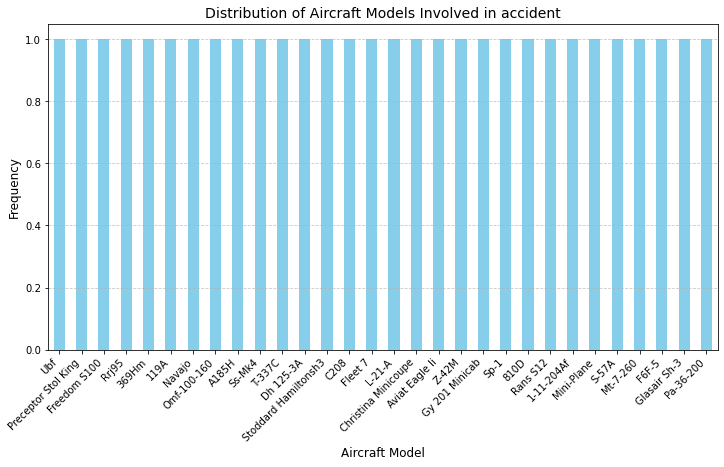

In [121]:
# Plot distribution of aircraft model
# Count occurrences of each aircraft model
model_counts = df['Model'].value_counts().tail(30)  # Top 15 models with most accidents

# Plot the distribution
plt.figure(figsize=(12, 6))
model_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title("Distribution of Aircraft Models Involved in accident", fontsize=14)
plt.xlabel("Aircraft Model", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Obj 1

Which aircraft models have the lowest accident rates?

This Distribution Indicates that the Model with low Frequency has low Accident Rates: THis are : 
        


In [122]:
models_with_one_occurrence = model_counts[model_counts == 1].index.tolist()
models_with_one_occurrence[:10]

['Ubf',
 'Preceptor Stol King',
 'Freedom S100',
 'Rrj95',
 '369Hm',
 '119A',
 'Navajo',
 'Omf-100-160',
 'A185H',
 'Ss-Mk4']

In [123]:
df['Make'].value_counts()

Cessna             25987
Piper              14254
Beech               5165
Bell                2606
Boeing              2461
                   ...  
Silvius                1
Panaplane              1
Robidoux Lionel        1
Means Rober C          1
Charland               1
Name: Make, Length: 7187, dtype: int64

In [124]:
df['Make'].value_counts()

Cessna             25987
Piper              14254
Beech               5165
Bell                2606
Boeing              2461
                   ...  
Silvius                1
Panaplane              1
Robidoux Lionel        1
Means Rober C          1
Charland               1
Name: Make, Length: 7187, dtype: int64

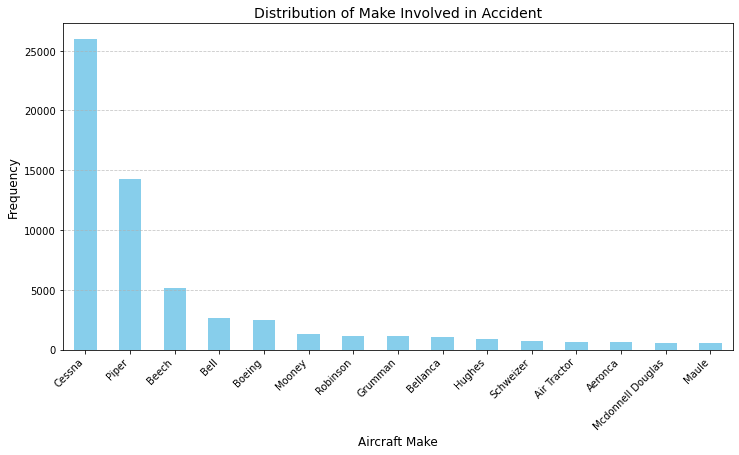

In [125]:
# Plot distribution of aircraft make
# Count occurrences of each aircraft make
make_all_count = df['Make'].value_counts()
make_counts = df['Make'].value_counts().head(15)  # Top 15 make with most accidents

# Plot the distribution
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title("Distribution of Make Involved in Accident", fontsize=14)
plt.xlabel("Aircraft Make", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [126]:
make_with_one_occurrence = make_all_count[make_all_count == 1].index.tolist()
make_with_one_occurrence[:10]

['Mitchell Derryle V',
 'Rose Rhinehart',
 'Richard O. Middlen',
 'Simoneau',
 'Via Inc',
 'Hilyard',
 'Anderson Rotorway',
 'Duci',
 'Siefert',
 'Arctic Aircraft Company']

In [127]:
df.groupby(['Make', 'Model'])['Accident.Number'].count().sort_values()

Make                      Model            
107.5 Flying Corporation  One Design Dr 107       1
Maule                     M5-210Tc                1
                          M5C                     1
                          M6235                   1
                          M7-235                  1
                                               ... 
Cessna                    150                   792
Piper                     Pa-28-140             893
Cessna                    172N                 1120
                          172                  1625
                          152                  2282
Name: Accident.Number, Length: 17538, dtype: int64

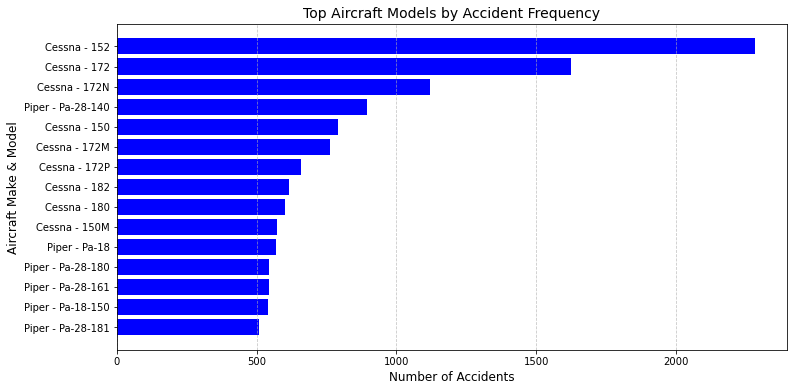

In [128]:
# Group by 'Make' and 'Model', then count accidents
accident_counts = df.groupby(['Make', 'Model'])['Accident.Number'].count().reset_index()

# Rename the count column for clarity
accident_counts.rename(columns={'Accident.Number': 'Accident_Count'}, inplace=True)

# Sort by accident count (highest first)
accident_counts = accident_counts.sort_values(by='Accident_Count', ascending=False)

# Select top 15 (modify as needed)
top_accidents = accident_counts.head(15)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_accidents['Make'] + " - " + top_accidents['Model'], top_accidents['Accident_Count'], color='blue')

# Customize the plot
plt.title("Top Aircraft Models by Accident Frequency", fontsize=14)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Aircraft Make & Model", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

The above analysis shows the aircrafts and models with the highest frequency of Accidents. Thi are top 15 models corresponding to their makes. It appears Cessna and Piper Make have high chances of getting accidents.

### OBJ 2

What are the most common causes of aviation accidents?

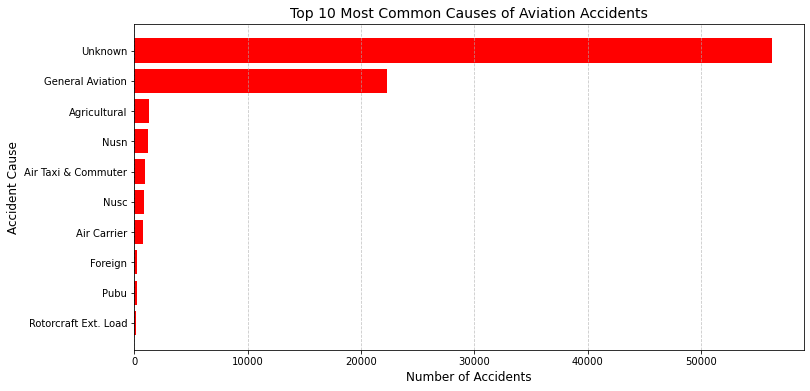

In [129]:
cause_counts = df['FAR.Description'].value_counts().reset_index()
cause_counts.columns = ['Accident Cause', 'Count']

# Select top 10 most common causes
top_causes = cause_counts.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_causes['Accident Cause'], top_causes['Count'], color='red')
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Accident Cause", fontsize=12)
plt.title("Top 10 Most Common Causes of Aviation Accidents", fontsize=14)
plt.gca().invert_yaxis()  # Highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

The Graph shows from the known Cause of Accidents, General aviation leads followed by Agriculture. But the Most cause appears to be unknown.

Rotorcraft Ext Load appears to have few cases of accident

### OBJ 3
How does the number of engines affect accident frequency and severity?

In [130]:
df.groupby(['Number.of.Engines'])['Total.Fatal.Injuries'].count()

Number.of.Engines
1    73046
2    10565
3      446
4      408
8        3
Name: Total.Fatal.Injuries, dtype: int64

In [131]:
# How often do accidents occur for different engine numbers?
# here we Count accidents per Number.of.Engines

engine_accident_counts = df['Number.of.Engines'].value_counts().sort_index()
engine_accident_counts


1    73046
2    10565
3      446
4      408
8        3
Name: Number.of.Engines, dtype: int64

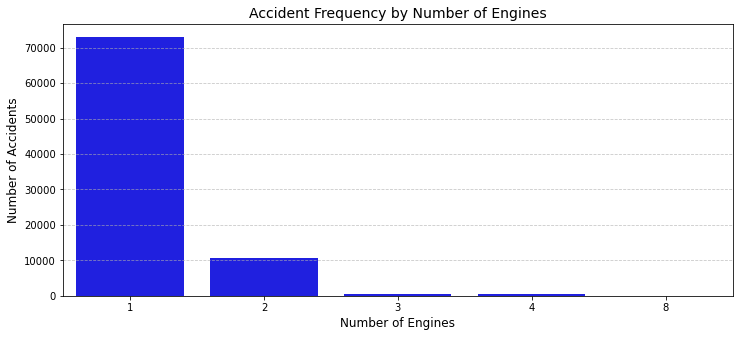

In [132]:
plt.figure(figsize=(12, 5))
sns.barplot(x=engine_accident_counts.index, y=engine_accident_counts.values, color="blue")
plt.xlabel("Number of Engines", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accident Frequency by Number of Engines", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

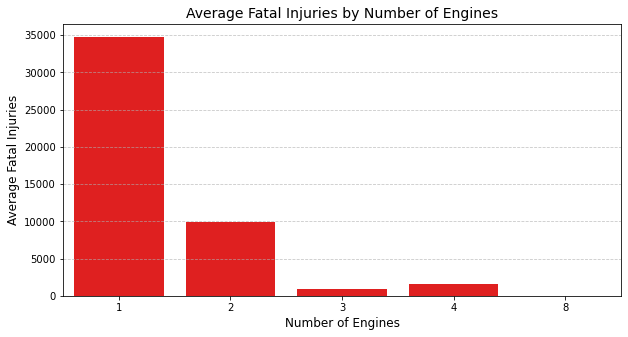

In [133]:
# Are accidents with more engines more severe?
# We Compare injury Total.Fatal.Injuries
# Analyze the average number of Total.Fatal.Injuries per engine type.

fatalities_per_engine = df.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum().reset_index()
fatalities_per_engine
plt.figure(figsize=(10, 5))
sns.barplot(x=fatalities_per_engine['Number.of.Engines'], y=fatalities_per_engine['Total.Fatal.Injuries'], color="red")
plt.xlabel("Number of Engines", fontsize=12)
plt.ylabel("Average Fatal Injuries", fontsize=12)
plt.title("Average Fatal Injuries by Number of Engines", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Here we see that :
Single-engine planes crash more often than multi-engine planes?

multi-engine plane accidents are less involved in accidents hence less Fatal Injuries.

This will helps aviation companies decide to purchase aircrafts with multi engines since they reduce risk.

### OBJ 4

What is the relationship between Number of Engines and accident rates?

In [134]:
cov_matrix = np.corrcoef(df['Number.of.Engines'],df['Total.Fatal.Injuries'] )
cov_matrix[0][1]

0.05449318588777948

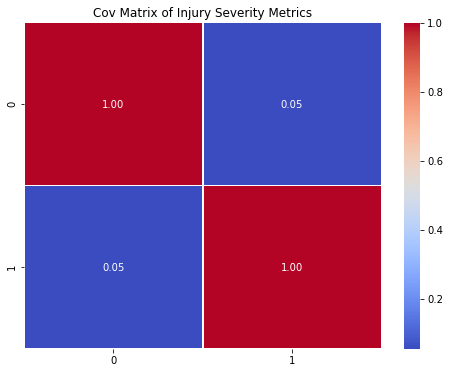

In [135]:
# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cov Matrix of Injury Severity Metrics")
plt.show()

The correlation coefficient is (0.05449318588777948) which indicates a week positive coreelation.  meaning there is a week positive relationship between the number of engines and the number of fatal injuries.

this is because if an aircraft has multiple engines, it might still operate after one fails, this could reduce the severity of crashes, making the correlation weak. And this was seen from the above analysis that when number of engines were high - the fatal injuries were low.
we concluded that aircrafts with multi engines experience few accidents.

Other factors discussed above  might be more important in determining accident severity.

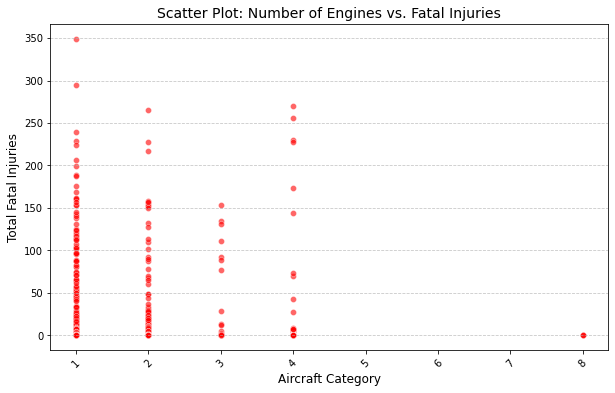

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number.of.Engines', y='Total.Fatal.Injuries', alpha=0.6, color="red")
#sns.regplot(data=df, x='Number.of.Engines', y='Total.Fatal.Injuries', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Aircraft Category", fontsize=12)
plt.ylabel("Total Fatal Injuries", fontsize=12)
plt.title("Scatter Plot: Number of Engines vs. Fatal Injuries", fontsize=14)
plt.xticks(rotation=45)  # Rotate category labels for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### CONCLUSION


Aircraft models with lower accident counts than others, indicating they may be safer or less frequently used.

Aircraft makes with the lowest accident counts  indicate better safety records

Planes with Multi engine are best to purchase for our business
